<a href="https://colab.research.google.com/github/Vite-Noiz/Machine-Learning-Course/blob/main/Dimensionality%20Reduction%20/TA/PCA_LDA_F_MNIST_TA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# F-MNIST

Labels

Each training and test example will be assigned to one of the following labels:

    0 T-shirt/top
    1 Trouser
    2 Pullover
    3 Dress
    4 Coat
    5 Sandal
    6 Shirt
    7 Sneaker
    8 Bag
    9 Ankle boot

## PCA

### Preparing

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from keras.datasets import fashion_mnist

In [ ]:
# Load the F-MNIST dataset from keras
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

print(f"Train data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")

# Reshape data to have 784 features (28x28 images flattened)
X_train_flatten = X_train.reshape(X_train.shape[0], -1)
X_test_flatten = X_test.reshape(X_test.shape[0], -1)

print(f"Train data after flattening shape: {X_train_flatten.shape}")
print(f"Test data after flattening shape: {X_test_flatten.shape}")

Train data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)
Train data after flattening shape: (60000, 784)
Test data after flattening shape: (10000, 784)


In [ ]:
print(X_train[0, 14:17, 14:17])
print(y_train[0:9])

[[217 223 222]
 [213 221 218]
 [200 205 211]]
[9 0 0 3 0 2 7 2 5]


In [ ]:
# Standardize the data (zero mean, unit variance)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_flatten)
X_test_scaled = scaler.transform(X_test_flatten)

In [ ]:
components_list = np.arange(10, 201, 10)  # Different number of components to test

# Store train and test accuracies for different numbers of components
train_accuracies = []
test_accuracies = []

import warnings
warnings.filterwarnings('ignore', category=UserWarning)
for n_components in components_list:
    # Apply PCA with n_components
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)

    # Train a classifier (Logistic Regression) on reduced data
    clf = LogisticRegression(max_iter=100)
    clf.fit(X_train_pca, y_train)

    # Predict on train and test data
    y_train_pred = clf.predict(X_train_pca)
    y_test_pred = clf.predict(X_test_pca)

    # Calculate accuracy for train and test
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

    print(f"PCA with {n_components} components: Train Accuracy = {train_acc:.4f}, Test Accuracy = {test_acc:.4f}")

PCA with 10 components: Train Accuracy = 0.7538, Test Accuracy = 0.7474
PCA with 20 components: Train Accuracy = 0.8018, Test Accuracy = 0.7908
PCA with 30 components: Train Accuracy = 0.8158, Test Accuracy = 0.8060
PCA with 40 components: Train Accuracy = 0.8249, Test Accuracy = 0.8167
PCA with 50 components: Train Accuracy = 0.8330, Test Accuracy = 0.8184
PCA with 60 components: Train Accuracy = 0.8388, Test Accuracy = 0.8252
PCA with 70 components: Train Accuracy = 0.8430, Test Accuracy = 0.8279
PCA with 80 components: Train Accuracy = 0.8467, Test Accuracy = 0.8310
PCA with 90 components: Train Accuracy = 0.8492, Test Accuracy = 0.8330
PCA with 100 components: Train Accuracy = 0.8505, Test Accuracy = 0.8341
PCA with 110 components: Train Accuracy = 0.8529, Test Accuracy = 0.8360
PCA with 120 components: Train Accuracy = 0.8548, Test Accuracy = 0.8354
PCA with 130 components: Train Accuracy = 0.8567, Test Accuracy = 0.8391
PCA with 140 components: Train Accuracy = 0.8573, Test Accur

Logistic Regression is a machine learning algorithm used for **binary classification** tasks. It predicts the probability that a given input belongs to one of two classes. The output is a probability value between 0 and 1, which is then converted into one of the two classes (e.g., 0 or 1). It uses a **sigmoid function** to map predicted values to probabilities. Despite its name, Logistic Regression is a classification algorithm, not a regression one.

 Logistic Regression can be used for multi-class classification, including tasks with 10 classes, like in the F-MNIST dataset. For multi-class problems, Logistic Regression uses an extension called one-vs-rest (OvR) or softmax (multinomial logistic regression), depending on the solver you choose.

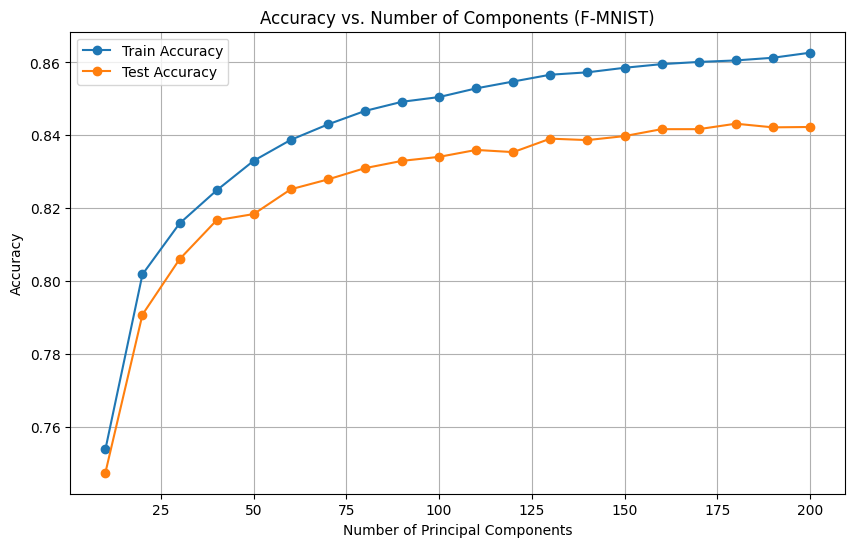

In [ ]:
# Plot train and test accuracy vs number of components
plt.figure(figsize=(10,6))
plt.plot(components_list, train_accuracies, label='Train Accuracy', marker='o')
plt.plot(components_list, test_accuracies, label='Test Accuracy', marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Components (F-MNIST)')
plt.legend()
plt.grid(True)
plt.show()

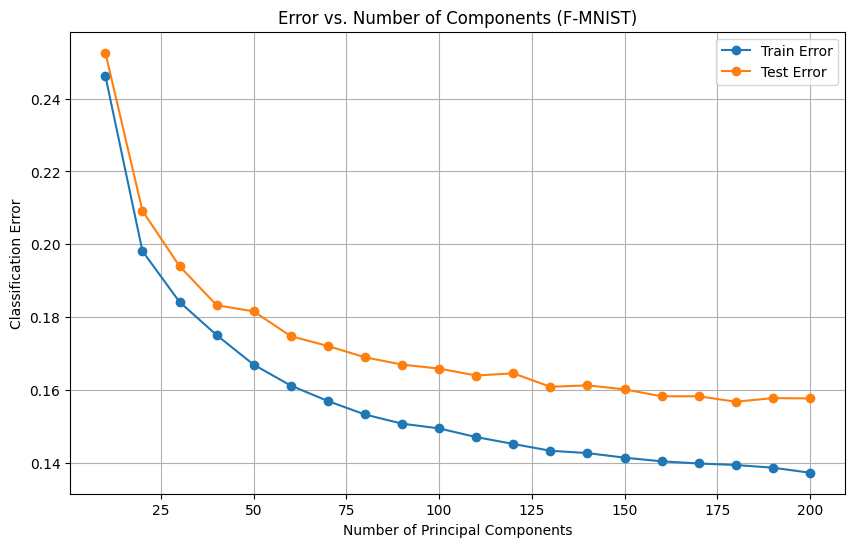

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(components_list, [1 - acc for acc in train_accuracies], label='Train Error', marker='o')
plt.plot(components_list, [1 - acc for acc in test_accuracies], label='Test Error', marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Classification Error')
plt.title('Error vs. Number of Components (F-MNIST)')
plt.legend()
plt.grid(True)
plt.show()

### Plots

Explanation and Expectation from the nD Plot:

The nD plot visualizes the dataset projected onto the first n principal components. It helps to visually assess how well PCA can separate different classes based on just two dimensions.
What You Should Expect:

    Clusters: The plot might show clusters of data points. Each cluster ideally represents a different class (like shirts, pants, shoes, etc. in F-MNIST). A good separation of clusters suggests that PCA does a good job at capturing relevant features for class discrimination.
    Overlap: If many points from different classes overlap, it indicates that PCA with two components is not sufficient to clearly distinguish between the classes.

#### 1D

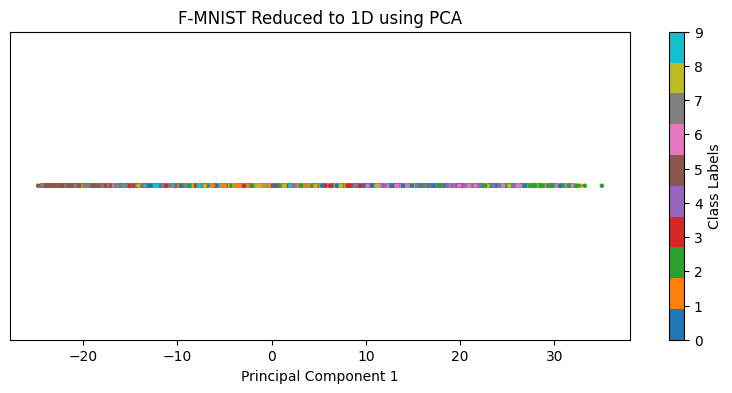

In [ ]:
# Apply PCA with 1 component for visualization
pca_1d = PCA(n_components=1)
X_train_1d = pca_1d.fit_transform(X_train_scaled)

# Create a 1D plot
plt.figure(figsize=(10, 4))

# Scatter plot of the first principal component
plt.scatter(X_train_1d, np.zeros_like(X_train_1d), c=y_train, cmap='tab10', s=5)

# Labeling the axes
plt.xlabel('Principal Component 1')
plt.yticks([])  # Remove y-axis ticks since it's a 1D plot

# Adding a color bar to show the mapping from colors to class labels
plt.colorbar(label='Class Labels')

plt.title('F-MNIST Reduced to 1D using PCA')
plt.show()

#### 2D

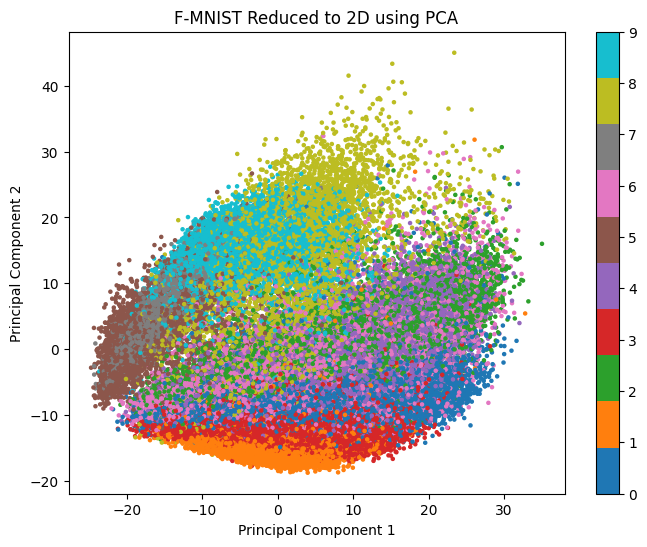

In [ ]:
# Apply PCA with 2 components for visualization
pca_2d = PCA(n_components=2)
X_train_2d = pca_2d.fit_transform(X_train_scaled)

# Plot first two components with labels
plt.figure(figsize=(8,6))
plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train[:], cmap='tab10', s=5)
plt.colorbar()
plt.title('F-MNIST Reduced to 2D using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

#### 3D

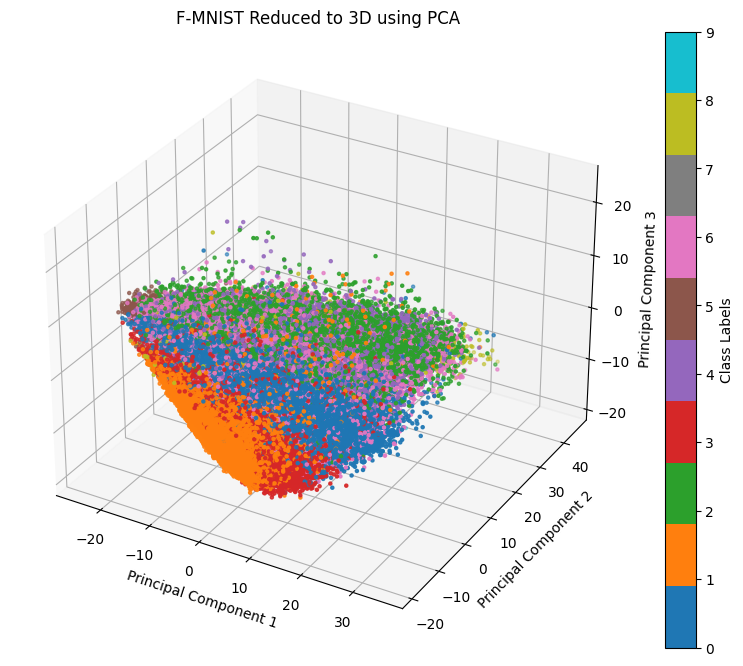

In [ ]:
from mpl_toolkits.mplot3d import Axes3D  # Needed for 3D plotting

# Apply PCA with 3 components for visualization
pca_3d = PCA(n_components=3)
X_train_3d = pca_3d.fit_transform(X_train_scaled)

# Create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')  # Add a 3D subplot

# Scatter plot of first three principal components
scatter = ax.scatter(X_train_3d[:, 0], X_train_3d[:, 1], X_train_3d[:, 2],
                     c=y_train, cmap='tab10', s=5)

# Labeling the axes
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

# Adding a color bar to show the mapping from colors to class labels
colorbar = fig.colorbar(scatter, ax=ax)
colorbar.set_label('Class Labels')

plt.title('F-MNIST Reduced to 3D using PCA')
plt.show()

#### Reconstructed images

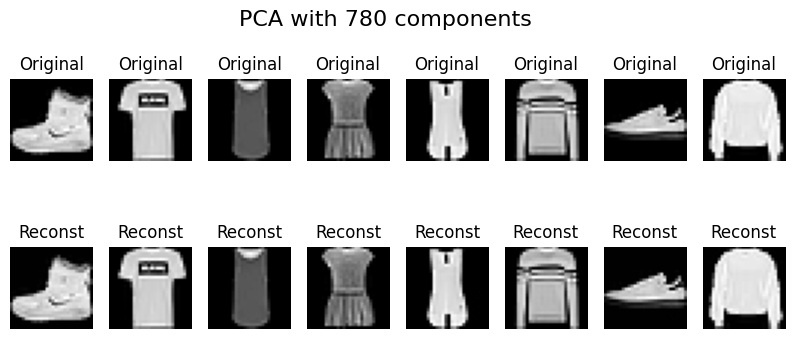

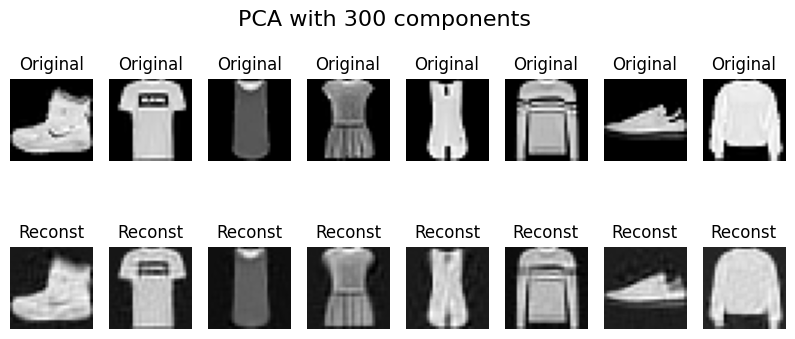

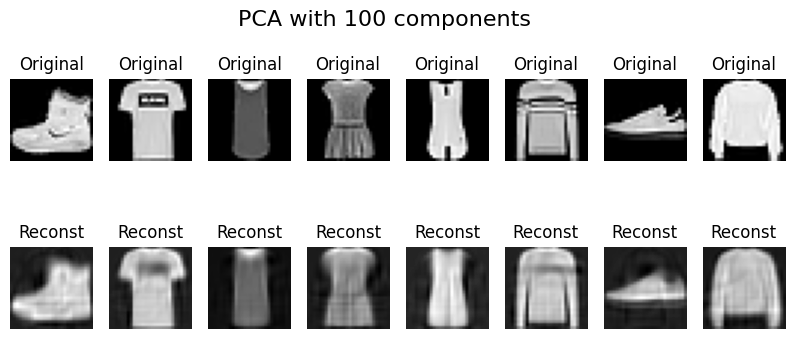

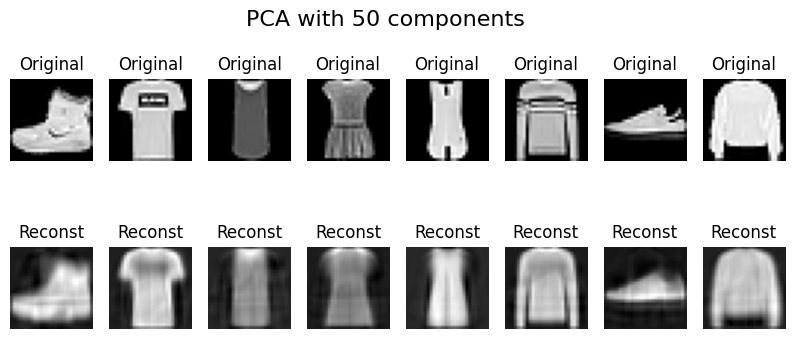

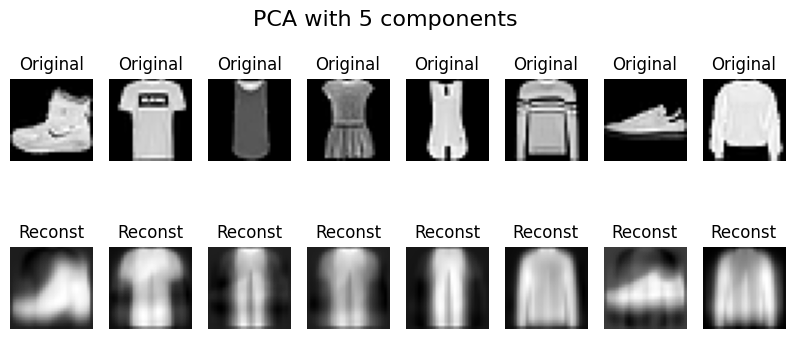

In [ ]:
def plot_images(original_images, reconstructed_images, n_images=8, n_components=None):
    plt.figure(figsize=(10, 4))
    for i in range(n_images):
        # Display original image
        ax = plt.subplot(2, n_images, i + 1)
        plt.imshow(original_images[i].reshape(28, 28), cmap='gray')
        plt.title("Original")
        plt.axis('off')

        # Display reconstructed image
        ax = plt.subplot(2, n_images, i + 1 + n_images)
        plt.imshow(reconstructed_images[i].reshape(28, 28), cmap='gray')
        plt.title("Reconst")
        plt.axis('off')

    # Add a main title for the figure, indicating the number of components used
    if n_components is not None:
        plt.suptitle(f"PCA with {n_components} components", fontsize=16)

    plt.show()

# Apply PCA with different numbers of components and plot
for n_components in [780, 300, 100, 50, 5]:
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_train_reconstructed = pca.inverse_transform(X_train_pca)
    X_train_reconstructed = scaler.inverse_transform(X_train_reconstructed)
    plot_images(X_train_flatten, X_train_reconstructed, n_components=n_components)

## LDA

### Preparing

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from keras.datasets import fashion_mnist

In [ ]:
# Load the F-MNIST dataset from keras
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

print(f"Train data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")

# Reshape data to have 784 features (28x28 images flattened)
X_train_flatten = X_train.reshape(X_train.shape[0], -1)
X_test_flatten = X_test.reshape(X_test.shape[0], -1)

print(f"Train data after flattening shape: {X_train_flatten.shape}")6
print(f"Test data after flattening shape: {X_test_flatten.shape}")

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Train data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)
Train data after flattening shape: (60000, 784)
Test data after flattening shape: (10000, 784)


In [ ]:
# Standardize the data (zero mean, unit variance)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_flatten)
X_test_scaled = scaler.transform(X_test_flatten)

In [ ]:
components_list = np.arange(1, 10, 1)  # Different number of components to test

# Store train and test accuracies for different numbers of components
train_accuracies = []
test_accuracies = []

import warnings
warnings.filterwarnings('ignore', category=UserWarning)
for n_components in components_list:
    # Apply LDA with n_components
    lda = LDA(n_components=n_components)
    X_train_lda = lda.fit_transform(X_train_scaled, y_train)
    X_test_lda = lda.transform(X_test_scaled)

    # Train a classifier (Logistic Regression) on reduced data
    clf = LogisticRegression(max_iter=100)
    clf.fit(X_train_lda, y_train)

    # Predict on train and test data
    y_train_pred = clf.predict(X_train_lda)
    y_test_pred = clf.predict(X_test_lda)

    # Calculate accuracy for train and test
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

    print(f"LDA with {n_components} components: Train Accuracy = {train_acc:.4f}, Test Accuracy = {test_acc:.4f}")

LDA with 1 components: Train Accuracy = 0.4812, Test Accuracy = 0.4745
LDA with 2 components: Train Accuracy = 0.6012, Test Accuracy = 0.5934
LDA with 3 components: Train Accuracy = 0.6746, Test Accuracy = 0.6657
LDA with 4 components: Train Accuracy = 0.7037, Test Accuracy = 0.6979
LDA with 5 components: Train Accuracy = 0.7481, Test Accuracy = 0.7402
LDA with 6 components: Train Accuracy = 0.7853, Test Accuracy = 0.7734
LDA with 7 components: Train Accuracy = 0.7973, Test Accuracy = 0.7846
LDA with 8 components: Train Accuracy = 0.8310, Test Accuracy = 0.8141
LDA with 9 components: Train Accuracy = 0.8419, Test Accuracy = 0.8241


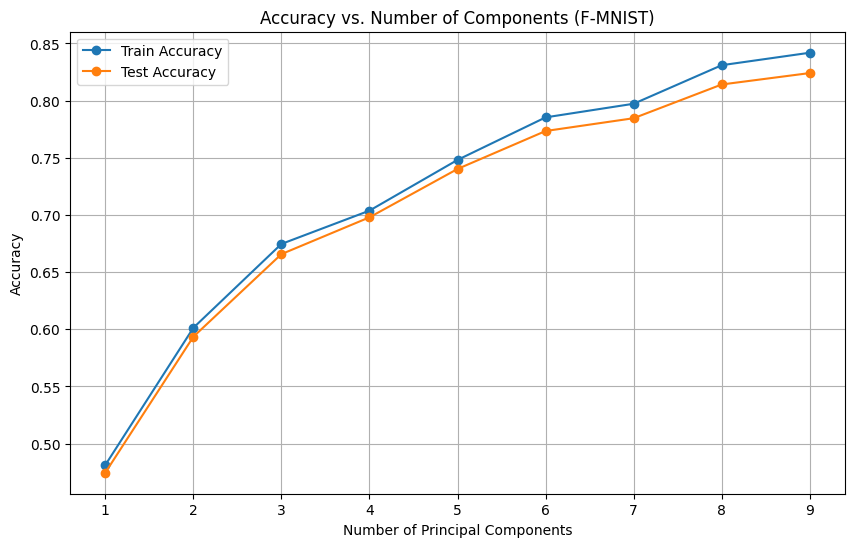

In [ ]:
# Plot train and test accuracy vs number of components
plt.figure(figsize=(10,6))
plt.plot(components_list, train_accuracies, label='Train Accuracy', marker='o')
plt.plot(components_list, test_accuracies, label='Test Accuracy', marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Components (F-MNIST)')
plt.legend()
plt.grid(True)
plt.show()

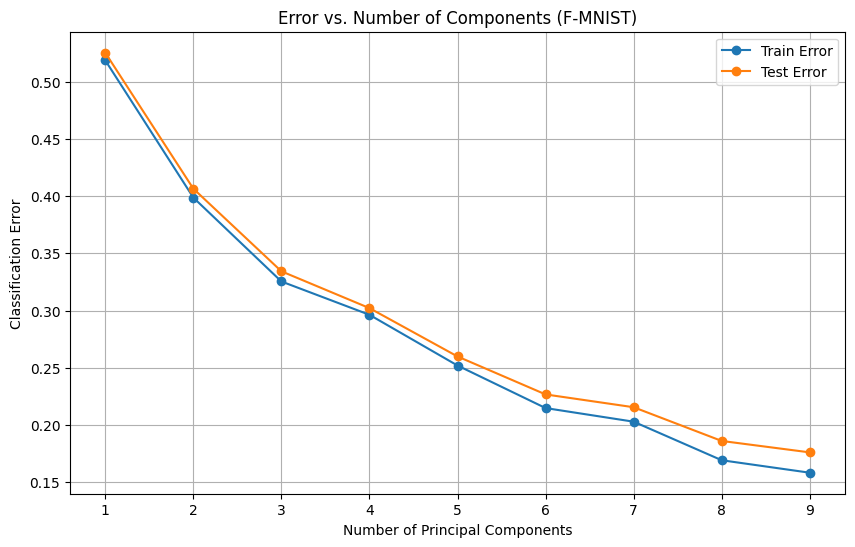

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(components_list, [1 - acc for acc in train_accuracies], label='Train Error', marker='o')
plt.plot(components_list, [1 - acc for acc in test_accuracies], label='Test Error', marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Classification Error')
plt.title('Error vs. Number of Components (F-MNIST)')
plt.legend()
plt.grid(True)
plt.show()

### Plots

#### 1D

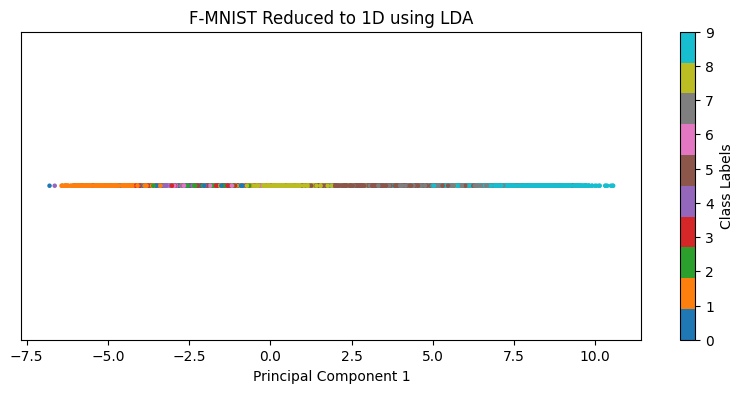

In [ ]:
# Apply LDA with 1 component for visualization
lda_1d = LDA(n_components=1)
X_train_1d = lda_1d.fit_transform(X_train_scaled, y_train)

# Create a 1D plot
plt.figure(figsize=(10, 4))

# Scatter plot of the first principal component
plt.scatter(X_train_1d, np.zeros_like(X_train_1d), c=y_train, cmap='tab10', s=5)

# Labeling the axes
plt.xlabel('Principal Component 1')
plt.yticks([])  # Remove y-axis ticks since it's a 1D plot

# Adding a color bar to show the mapping from colors to class labels
plt.colorbar(label='Class Labels')

plt.title('F-MNIST Reduced to 1D using LDA')
plt.show()

#### 2D

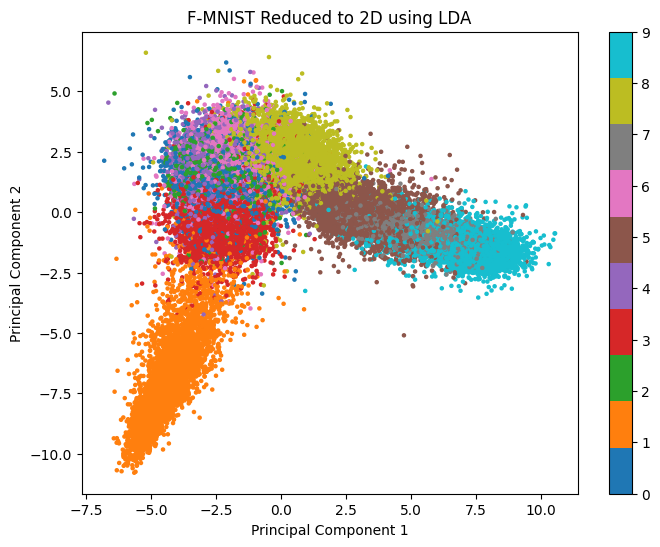

In [ ]:
# Apply LDA with 2 components for visualization
lda_2d = LDA(n_components=2)
X_train_2d = lda_2d.fit_transform(X_train_scaled, y_train)

# Plot first two components with labels
plt.figure(figsize=(8,6))
plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train[:], cmap='tab10', s=5)
plt.colorbar()
plt.title('F-MNIST Reduced to 2D using LDA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

#### 3D

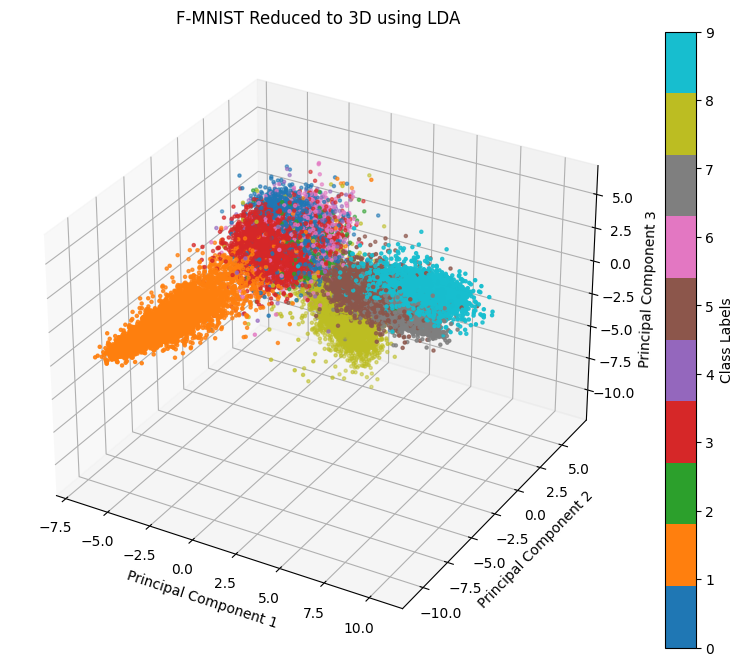

In [ ]:
from mpl_toolkits.mplot3d import Axes3D  # Needed for 3D plotting

# Apply LDA with 3 components for visualization
lda_3d = LDA(n_components=3)
X_train_3d = lda_3d.fit_transform(X_train_scaled, y_train)

# Create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')  # Add a 3D subplot

# Scatter plot of first three principal components
scatter = ax.scatter(X_train_3d[:, 0], X_train_3d[:, 1], X_train_3d[:, 2],
                     c=y_train, cmap='tab10', s=5)

# Labeling the axes
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

# Adding a color bar to show the mapping from colors to class labels
colorbar = fig.colorbar(scatter, ax=ax)
colorbar.set_label('Class Labels')

plt.title('F-MNIST Reduced to 3D using LDA')
plt.show()